## 1. Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Importing Data

In [4]:
df= pd.read_csv("gas_turbines.csv")
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [21]:
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [6]:
X= df.drop(columns = ['TEY'], axis = 1) 
y= df.iloc[:,7]

In [7]:
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [8]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [12]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.1, random_state = 42)
X_train_scaled= scale(X_train)
X_test_scaled= scale(X_test)
X_test_scaled

array([[ 0.82623246, -0.43954308, -0.25924569, ...,  0.10039242,
        -0.3796304 , -0.69217007],
       [ 0.35282087,  0.23279782,  0.80230139, ..., -1.18541222,
         0.39149515, -1.09475442],
       [ 0.32839008, -0.07135639,  0.25312287, ...,  0.01665304,
        -0.00296896, -0.31891741],
       ...,
       [-0.74071701,  0.37687087,  0.43427425, ...,  1.77157829,
        -1.00127821, -0.4818816 ],
       [-0.49965786, -0.39151873,  0.64680105, ..., -0.26517949,
        -0.48137538,  0.12808615],
       [ 0.13151427,  0.32884652,  0.98830762, ..., -1.40331469,
         0.13152215, -0.64456466]])

In [14]:
input_size = len(X.columns)
output_size = 1
hidden_layer_size = 50
model = tf.keras.Sequential([tf.keras.layers.Dense(hidden_layer_size, input_dim = input_size, activation = 'relu'),
                             tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                             tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                             tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),     
                             tf.keras.layers.Dense(output_size)])

In [15]:
optimizer= tf.keras.optimizers.SGD(learning_rate = 0.03)
model.compile(optimizer= 'adam', loss= 'mean_squared_error', metrics= ['MeanSquaredError'])

In [16]:
num_epochs= 50
early_stopping= tf.keras.callbacks.EarlyStopping(patience = 2)
model.fit(X_train_scaled, y_train, callbacks = early_stopping, validation_split = 0.1, epochs = num_epochs, verbose = 2)

Epoch 1/50
381/381 - 8s - loss: 2720.0293 - mean_squared_error: 2720.0293 - val_loss: 192.9535 - val_mean_squared_error: 192.9535 - 8s/epoch - 20ms/step
Epoch 2/50
381/381 - 1s - loss: 113.7419 - mean_squared_error: 113.7419 - val_loss: 93.3873 - val_mean_squared_error: 93.3873 - 970ms/epoch - 3ms/step
Epoch 3/50
381/381 - 1s - loss: 56.6484 - mean_squared_error: 56.6484 - val_loss: 46.1507 - val_mean_squared_error: 46.1507 - 1s/epoch - 3ms/step
Epoch 4/50
381/381 - 1s - loss: 28.5707 - mean_squared_error: 28.5707 - val_loss: 23.7918 - val_mean_squared_error: 23.7918 - 1s/epoch - 3ms/step
Epoch 5/50
381/381 - 1s - loss: 14.2725 - mean_squared_error: 14.2725 - val_loss: 11.4052 - val_mean_squared_error: 11.4052 - 1s/epoch - 3ms/step
Epoch 6/50
381/381 - 1s - loss: 7.0989 - mean_squared_error: 7.0989 - val_loss: 5.1083 - val_mean_squared_error: 5.1083 - 1000ms/epoch - 3ms/step
Epoch 7/50
381/381 - 1s - loss: 4.0073 - mean_squared_error: 4.0073 - val_loss: 3.1360 - val_mean_squared_error:

In [17]:
test_loss, mean_squared_error= model.evaluate(X_test_scaled, y_test)

47/47 [==============================] - 0s 3ms/step - loss: 1.0137 - mean_squared_error: 1.0137


In [18]:
predictions= model.predict_on_batch(X_test_scaled)

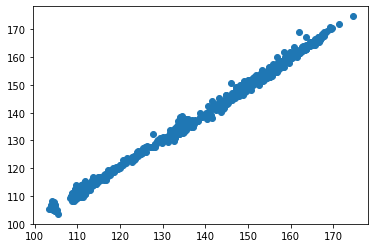

In [19]:
plt.scatter(y_test, predictions)

In [20]:
predictions_df= pd.DataFrame()
predictions_df['Actual']= y_test
predictions_df['Predicted']= predictions
predictions_df['% Error']= abs(predictions_df['Actual'] - predictions_df['Predicted'])/predictions_df['Actual']*100
predictions_df.reset_index(drop= True)

,Actual,Predicted,% Error
0,134.46,134.814545,0.263680
1,111.88,112.924385,0.933487
2,133.72,134.313675,0.443969
3,133.79,132.890518,0.672309
4,110.77,111.662872,0.806060
...,...,...,...
1499,132.85,133.281509,0.324809
1500,125.07,125.414597,0.275523
1501,160.95,161.259888,0.192537
1502,133.12,133.747437,0.471332
